In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from scipy.signal import freqz

In [2]:
with open('LPC_exercise1.dat', 'r') as f:
    data = f.readlines()
data = np.array([float(x) for x in data]) # convert to numpy array


In [3]:
p = 12 # order of the model
N = 128 # number of samples to consider

data_sample = data[100:100+N] # consider only the first N samples
window = np.hamming(N) # windowing function
data_sample = data_sample * window # apply windowing

# compute the autocorrelation matrix and autocorrelation vector
R_temp = toeplitz(data_sample[:p])
r = R_temp[1:, 0] # get acf for all lags except 0
R = R_temp[:p-1, :p-1] # get acf for all lags except p

# solve the normal equations
a = np.linalg.solve(R, r)

[ 1.          0.6358048  -0.24896612  0.53491171  0.09997381 -0.19922258
  0.24780877  0.58793286 -0.10987639 -0.07001946  0.94291268 -1.66470402]


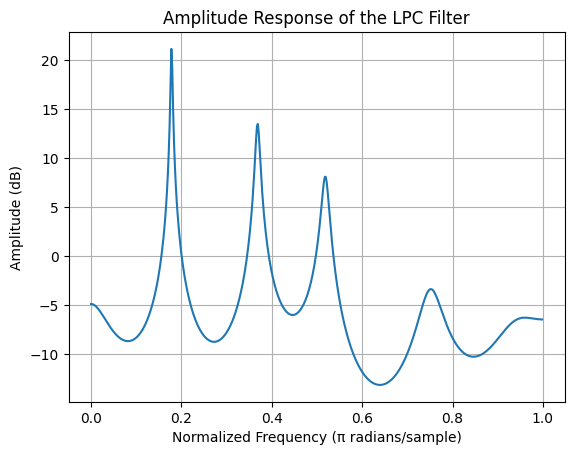

In [4]:
# Append 1 to the beginning of the coefficients (for freqz)
a = np.concatenate(([1], -a))
print (a)

# Use freqz to compute the frequency response of the LPC filter
w, h = freqz([1], a, worN=512)

# Plot the amplitude response
plt.plot(w / np.pi, 20 * np.log10(np.abs(h)))
plt.title('Amplitude Response of the LPC Filter')
plt.xlabel('Normalized Frequency (π radians/sample)')
plt.ylabel('Amplitude (dB)')
plt.grid()
plt.show()